In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import pandas as pd
%matplotlib inline

In [3]:
pm25 = np.load('../../../Desktop/totarry.npy')
bc = np.load('../../../Desktop/tot_ebu_in_bc.npy')
co = np.load('../../../Desktop/tot_ebu_in_co.npy')
ppt = xr.open_dataset('../../../Desktop/wrfpost_2008_d01.nc')
datelist = pd.date_range(start='20080101',end='20081231',freq='D')

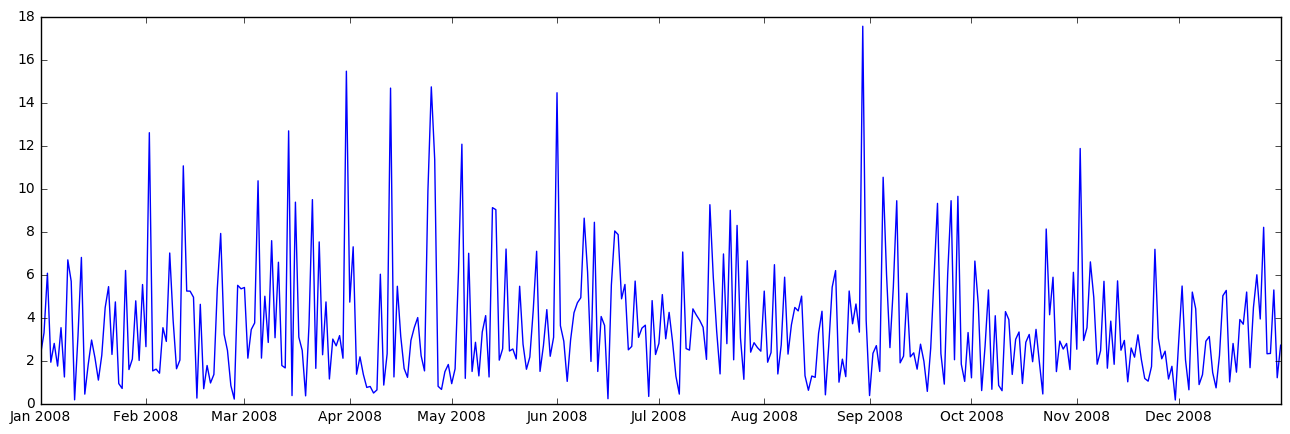

In [21]:
plt.rcParams["figure.figsize"] = 16,5
plt.plot(datelist,np.mean(bc.reshape(-1, 24), axis=1))
plt.show()

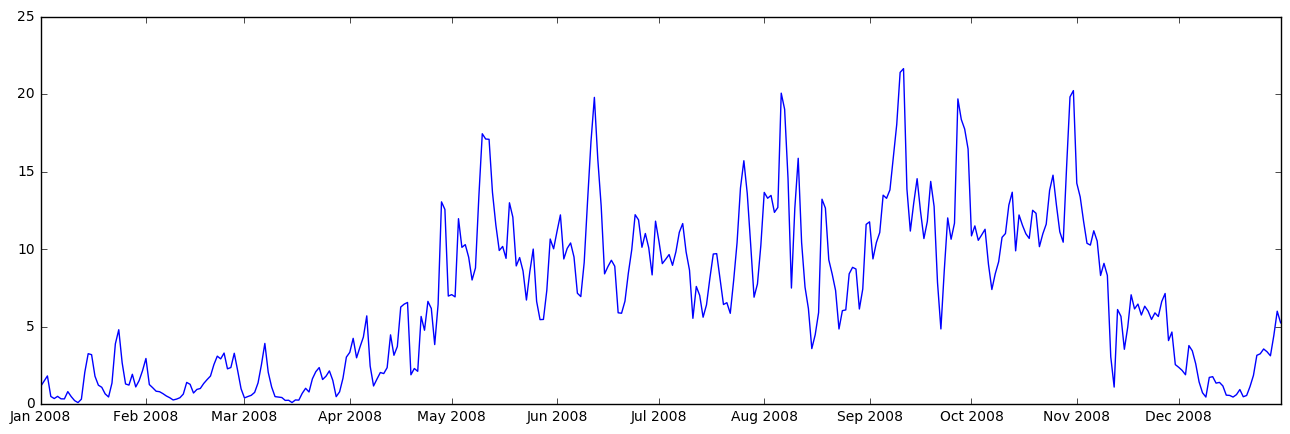

In [5]:
plt.plot(datelist,np.mean(np.mean(ppt.PPT[:,95:140,172:218],axis=1),axis=1))

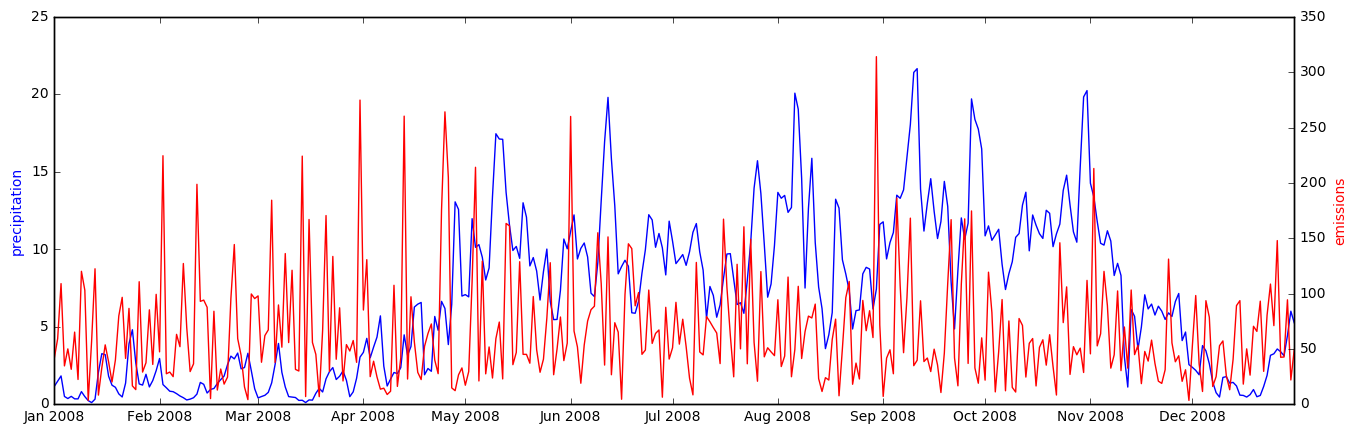

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(datelist,np.mean(np.mean(ppt.PPT[:,95:140,172:218],axis=1),axis=1),'b-')
ax1.set_ylabel('precipitation',color='b')
ax2 = ax1.twinx()
ax2.plot(datelist,np.mean(pm25.reshape(-1, 24), axis=1),'r-')
ax2.set_ylabel('emissions',color='r')
# ax2.set_ylim([0,20000])
plt.show()


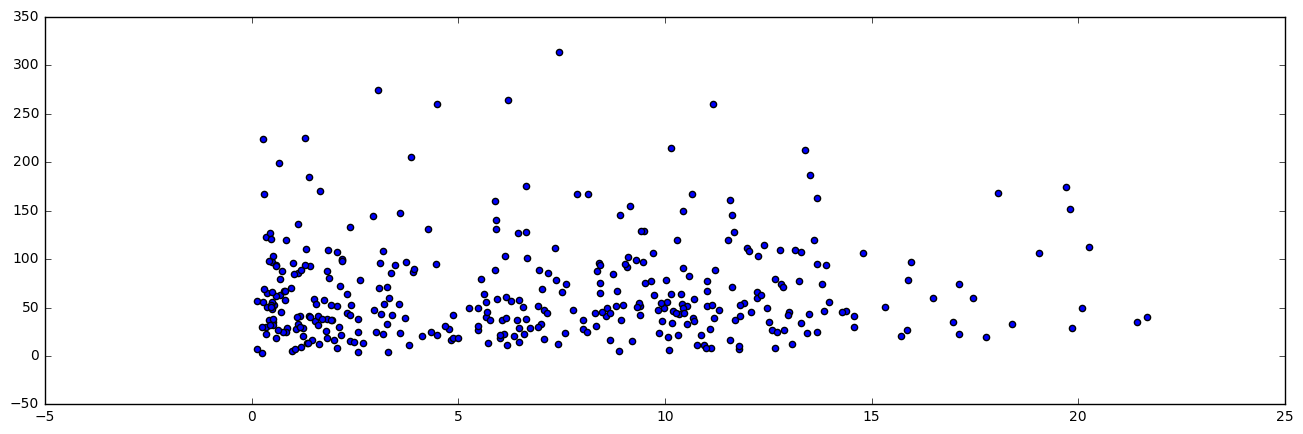

In [7]:
plt.scatter(np.mean(np.mean(ppt.PPT[:,95:140,172:218],axis=1),axis=1),np.mean(pm25.reshape(-1, 24), axis=1))

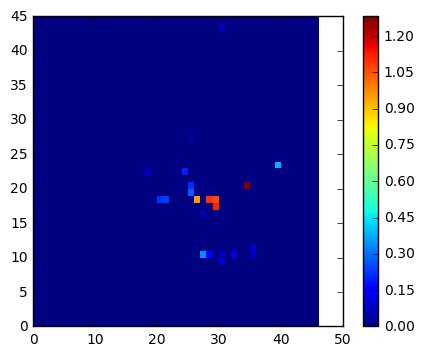

In [9]:
plt.rcParams["figure.figsize"] = 5,4
dom=np.load('../../../Desktop/seedom.npy')
plt.pcolor(dom)
plt.colorbar()

(366, 137, 421)


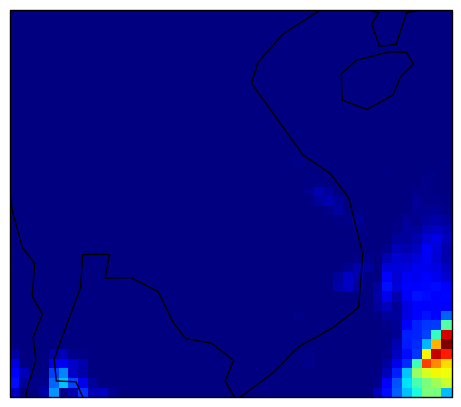

In [36]:
print(ppt.PPT.shape)
plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(ppt.PPT[0,:,:])

# print(ppt.lon,ppt.lat,ppt.PPT.shape)
plt.pcolor(ppt.lon[172:218],ppt.lat[95:],ppt.PPT[0,95:,172:218])
ax=plt.gca()
ax.coastlines()
plt.show()